In [1]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

In [4]:
q3_df = pd.read_csv("Trucks.csv")

In [5]:
q3_df.head(50)

,Unnamed: 0,Freq,period,parked,light,collision
0,1,712,0,1,1,0
1,2,613,1,1,1,0
2,3,192,0,1,1,1
3,4,179,1,1,1,1
4,5,2557,0,0,1,0
5,6,2373,1,0,1,0
6,7,10749,0,0,1,1
7,8,9768,1,0,1,1
8,9,634,0,1,0,0
9,10,411,1,1,0,0


In [14]:
q3_df = q3_df.drop('Unnamed: 0', axis=1)

In [26]:
q3_df

,Freq,period,parked,light,collision
0,712,0,1,1,0
1,613,1,1,1,0
2,192,0,1,1,1
3,179,1,1,1,1
4,2557,0,0,1,0
5,2373,1,0,1,0
6,10749,0,0,1,1
7,9768,1,0,1,1
8,634,0,1,0,0
9,411,1,1,0,0


In [19]:
q3_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Freq,24.0,1448.916667,2794.132578,39.0,188.75,536.5,994.75,10749.0
period,24.0,0.500000,0.510754,0.0,0.00,0.5,1.00,1.0
parked,24.0,0.500000,0.510754,0.0,0.00,0.5,1.00,1.0
light,24.0,0.333333,0.481543,0.0,0.00,0.0,1.00,1.0
collision,24.0,0.500000,0.510754,0.0,0.00,0.5,1.00,1.0


In [22]:
q3_df.dtypes

Freq         int64
period       int64
parked       int64
light        int64
collision    int64
dtype: object

In [23]:
type(q3_df)

pandas.core.frame.DataFrame

In [24]:
q3_df.isnull().sum()

Freq         0
period       0
parked       0
light        0
collision    0
dtype: int64

In [29]:
q3_df['collision'].value_counts()

1    12
0    12
Name: collision, dtype: int64

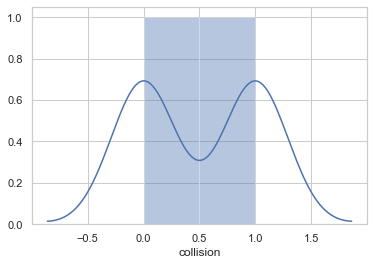

In [30]:
sns.distplot(q3_df['collision'])
plt.show() ### Not required in this version, inserted just to show that if graph is not printing then this is required

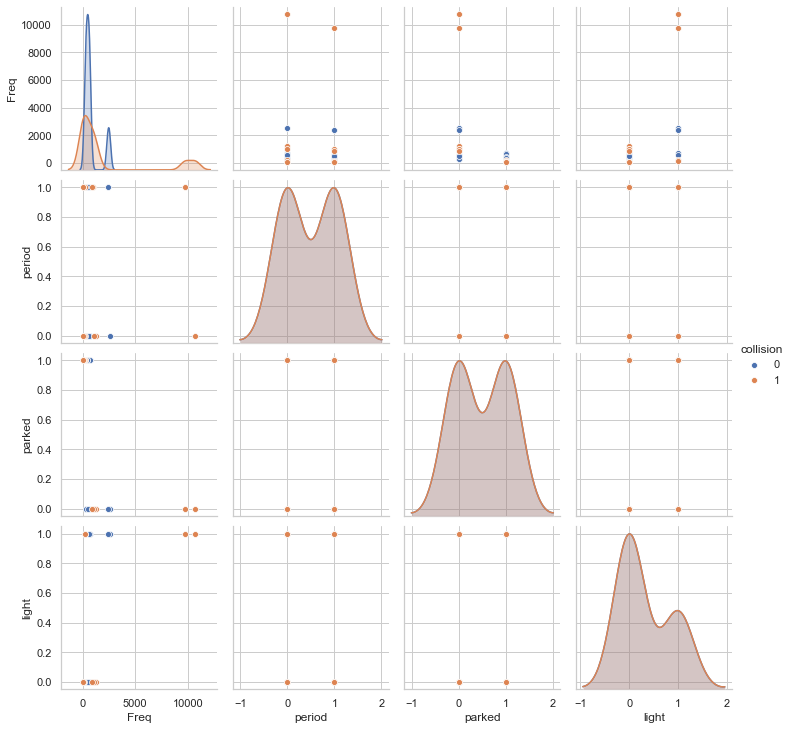

In [31]:
sns.pairplot(q3_df, hue='collision')

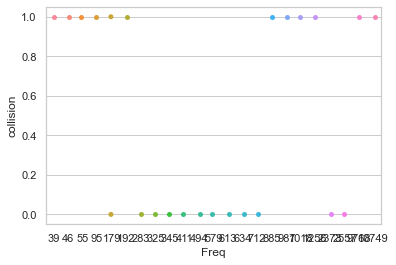

In [51]:
sns.stripplot(q3_df['Freq'], q3_df['collision']) ### Concentration of observations

In [77]:
count_no_sub = len(q3_df[q3_df['collision']== 0])
count_sub = len(q3_df[q3_df['collision']== 1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Default is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Default", pct_of_sub*100)

percentage of no Default is 50.0
percentage of Default 50.0


In [80]:
# Prepare training and test data and scale it
X = np.asmatrix(q3_df[['Freq', 'period', 'parked', 'light']])
X = scale(X)
Y = np.asarray(q3_df[['collision']])

In [81]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

C:\Users\ANIL FULE\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [82]:
# Predict it
pred_class = model.predict(X)
q3_df['Prediction'] = pred_class 

In [83]:
# Check Correlation values
#Refer on correlation at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data= data_df[['Freq', 'period', 'parked', 'light']]
Cor1 = data.corr()
Cor1

,Freq,period,parked,light
Freq,1.000000,-0.034152,-4.230794e-01,5.025354e-01
period,-0.034152,1.000000,0.000000e+00,0.000000e+00
parked,-0.423079,0.000000,1.000000e+00,-2.943923e-17
light,0.502535,0.000000,-2.943923e-17,1.000000e+00


In [84]:
#generate Confusion Matrix
# Please refer for confusion matrix http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(Y, pred_class)

array([[8, 4],
       [6, 6]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24

